In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump
from xgboost import XGBRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs


from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Comecou!!


C:\Users\disrct\AppData\Local\Temp\ipykernel_19888\653987841.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[i, item] = 1
C:\Users\disrct\AppData\Local\Temp\ipykernel_19888\653987841.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[i, item] = 1
C:\Users\disrct\AppData\Local\Temp\ipykernel_19888\653987841.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

Rows: 20058
Columns: 941


C:\Users\disrct\AppData\Local\Temp\ipykernel_19888\653987841.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[index, "cluster"] = preds[index]


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20053    4.0
20054    4.0
20055    4.0
20056    4.0
20057    4.0
Name: cluster, Length: 20058, dtype: float64


C:\Users\disrct\AppData\Local\Temp\ipykernel_19888\653987841.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5]})
C:\Users\disrct\AppData\Local\Temp\ipykernel_19888\653987841.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3], 4:cen_y[4], 5:cen_y[5]})
C:\Users\disrct\AppData\Local\Temp\ipykernel_19888\653987841.py:81: PerformanceWarning: DataFrame is

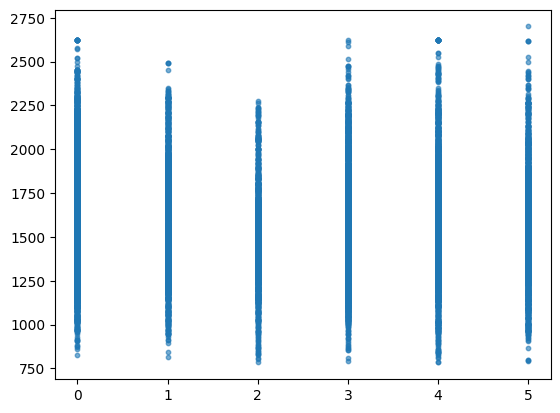

In [60]:
df = pd.read_csv('DataSet\\games.csv')

df.columns = df.columns.str.strip()

df.dropna()

df.drop(
    ['id', 'created_at', 'white_id', 'black_id'],
    axis = 1,
    inplace = True
)


# print(df)

top10 = []
le = LabelEncoder()

print("Comecou!!")

# moves = moves.T
df['moves'] = df["moves"].str.split()
moves = df['moves']
i = 0


for sublist in moves:
    moves = sublist[0: 10: 2]
    for item in sublist:
        if item in df.loc[i, 'moves']:
            df.loc[i, item] = 1
    i += 2
    if i > 20056:
        break


rows = df.shape[0] 
cols = df.shape[1] 
print("Rows: " + str(rows)) 
print("Columns: " + str(cols)) 

df = df.fillna((int)(0))


df.drop(
    [ 'moves'],
    axis = 1,
    inplace = True
)
#######################################################################################

df['victory_status'] = le.fit_transform(df['victory_status'])
df['winner'] = le.fit_transform(df['winner'])
df['increment_code'] = le.fit_transform(df['increment_code'])
df['opening_eco'] = le.fit_transform(df['opening_eco'])
df['opening_name'] = le.fit_transform(df['opening_name'])

Y = df['winner']
X = df.drop(['winner', 'winner'], axis = 1)

model = MiniBatchKMeans(n_clusters=6,
                        random_state=5464,
                        batch_size=20,
                        n_init="auto" )
model.fit(X)
dump(model, 'chess.pkl')

preds = model.predict(X)
for index in df.index:
    df.loc[index, "cluster"] = preds[index]

print(df['cluster'])
centroids = model.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3], 4:cen_y[4], 5:cen_y[5]})

colors = ['#DF2020', '#81DF20', '#2095DF', '#677DB7', '#191308', '#21FA90']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5]})

plt.scatter(df['cluster'], df['white_rating'], alpha = 0.6, s=10)


C:\Users\disrct\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


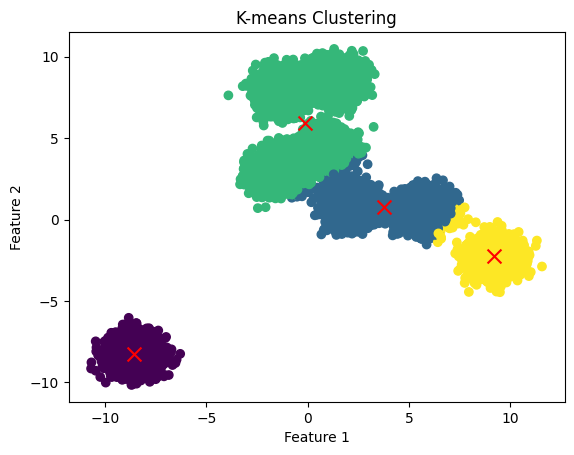

In [37]:
np.random.seed(0)
n_samples = 20000
X, y = make_blobs(n_samples=n_samples, centers=8, cluster_std=0.60, random_state=0)
# Perform K-means clustering
kmeans = MiniBatchKMeans(n_clusters=4)
kmeans.fit(X)
# Assign cluster labels to each data point
labels = kmeans.labels_
# Plot the data points and their cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=100)
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()